In [1]:
url = 'https://en.wikipedia.org/wiki/Machine_learning'

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Machine learning - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-language-alert-in-sidebar-enabled vector-feature-sticky-header-disabled vector-feature-page-tools-enabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-

In [3]:
from html.parser import HTMLParser
class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 Overview 2 History and relationships to other fields 
				Toggle History and relationships to other fields subsection
			 2.1 Artificial intelligence 2.2 Data mining 2.3 Optimization 2.4 Generalization 2.5 Statistics 2.6 Physics 3 Theory 4 Approaches 
				Toggle Approaches subsection
			 4.1 Supervised learning 4.2 Unsupervised learning 4.3 Semi-supervised learning 4.4 Reinforcement learning 4.5 Dimensionality reduction 4.6 Other types 4.6.1 Self-learning 4.6.2 Feature learning 4.6.3 Spar

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake

In [23]:
import nlp_rake

extractor = nlp_rake.Rake(max_words=2,min_freq=10,min_chars=5)
res = extractor.apply(text)
res

[('data mining', 4.0),
 ('main article', 4.0),
 ('wayback machine', 3.9714285714285715),
 ('machine learning', 3.91844843897824),
 ('retrieved 2018-08-20', 3.8758503401360542),
 ('artificial intelligence', 3.875757575757576),
 ('training data', 3.7142857142857144),
 ('training', 1.7142857142857142),
 ('model', 1.6333333333333333),
 ('field', 1.3333333333333333),
 ('learn', 1.2857142857142858),
 ('statistics', 1.0714285714285714),
 ('original', 1.027027027027027),
 ('archived', 1.0136986301369864)]

In [24]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


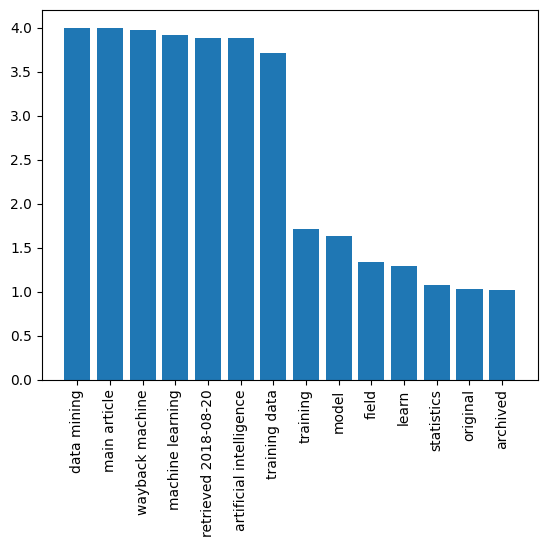

In [25]:
import matplotlib.pyplot as plt
def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [26]:
!{sys.executable} -m pip install wordcloud

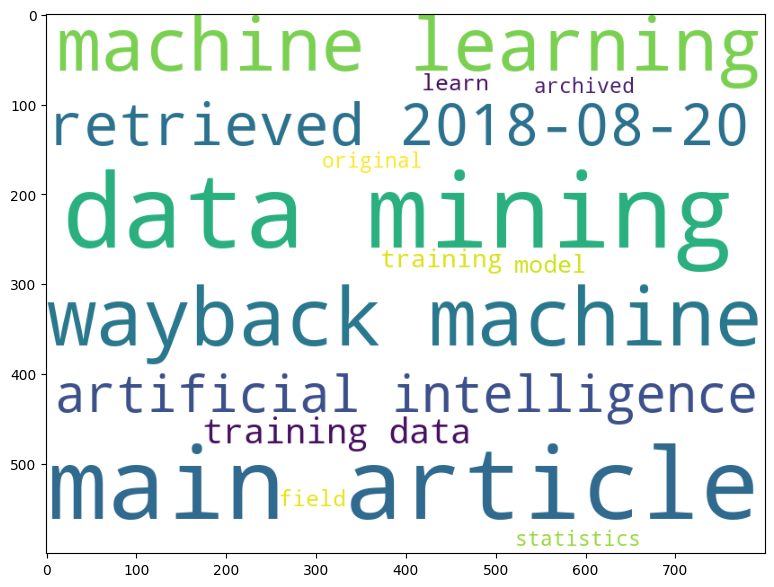

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

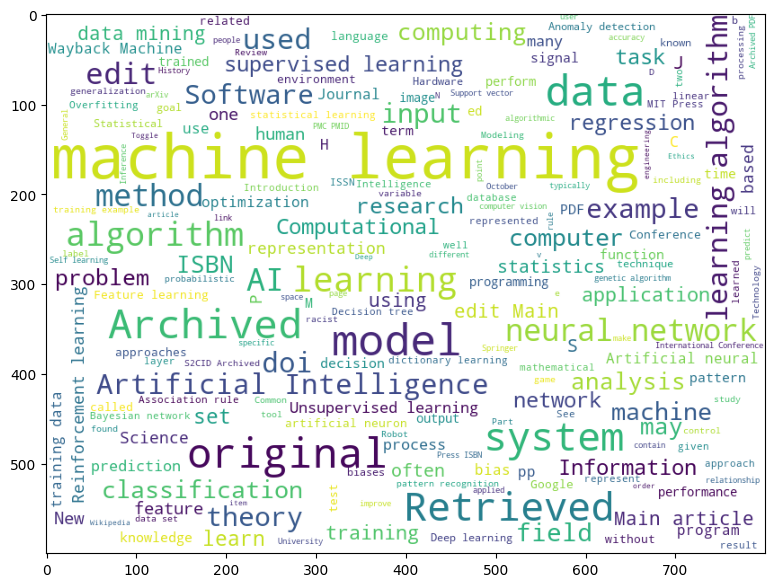

In [20]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))